In [5]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# **Loading data and creating Signals objects**

/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


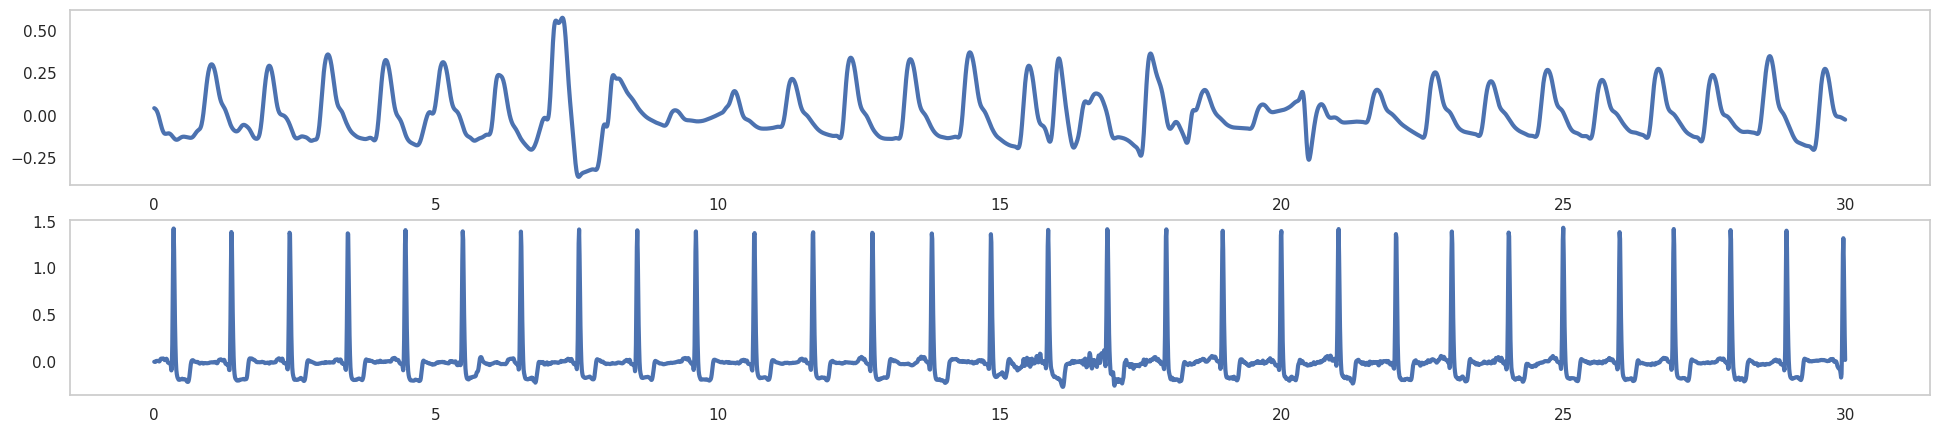

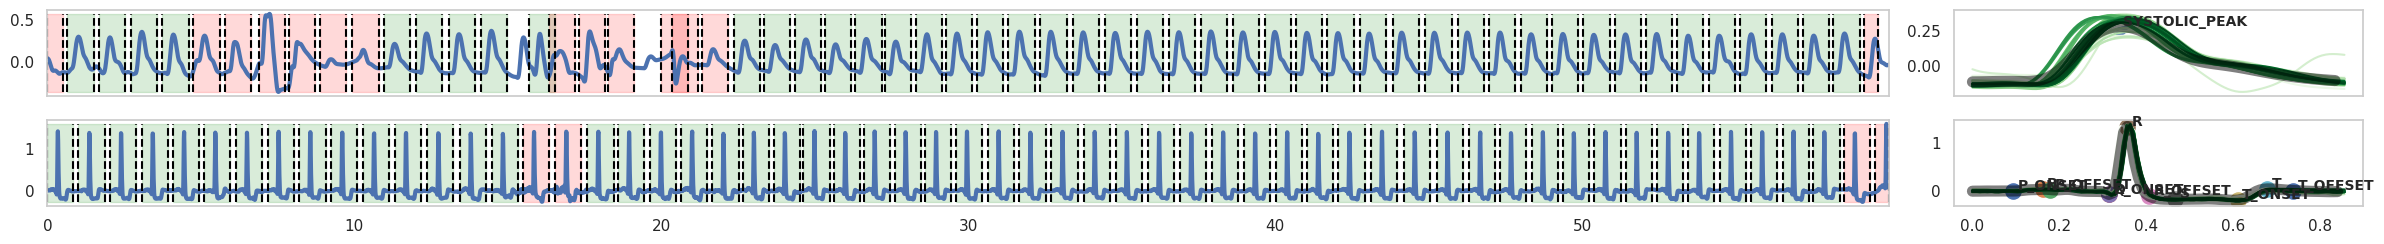

In [8]:
from msr.data.download.mimic import load_mimic_raw_tensors_for_split, FS
from msr.data.measurements import MimicMeasurement

data, targets = load_mimic_raw_tensors_for_split("val", "sbp_dbp_avg")
data, targets = data.numpy(), targets.numpy()
sample = data[111]
ppg, ecg = sample.T
measurement = MimicMeasurement(ppg, ecg, FS)
measurement.set_beats(source_channel='ecg', align_to_peak=True)
measurement.set_agg_beat()
ppg_sig = measurement['ppg']

fig, axes = plt.subplots(2, 1, figsize=(24, 5))
measurement.plot(0, 30, axes=axes)
measurement.plot_beats_segmentation(invalid=False)

/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/neurokit2/hrv/hrv_nonlinear.py:453: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


{'basic__mean': 0.41408602150537627,
 'basic__std': 0.1749149259367435,
 'basic__median': 0.3651026392961877,
 'basic__skewness': 0.6252704982333603,
 'basic__kurtosis': -0.1153729816950051,
 'peaks_troughs__peaks__mean': 0.303502289533184,
 'peaks_troughs__peaks__std': 0.08277663002553579,
 'peaks_troughs__peaks__median': 0.33232133441430384,
 'peaks_troughs__peaks__skewness': -0.6345522766534557,
 'peaks_troughs__peaks__kurtosis': 1.517969099252177,
 'peaks_troughs__troughs__mean': -0.13470690340790878,
 'peaks_troughs__troughs__std': 0.06147684915168106,
 'peaks_troughs__troughs__median': -0.14015778623673752,
 'peaks_troughs__troughs__skewness': 0.09182908376762133,
 'peaks_troughs__troughs__kurtosis': 7.1260832048535985,
 'peaks_troughs__amplitudes__mean': 0.4382091929410927,
 'peaks_troughs__amplitudes__std': 0.127612378791998,
 'peaks_troughs__amplitudes__median': 0.4742997362269935,
 'peaks_troughs__amplitudes__skewness': -0.9527767374823883,
 'peaks_troughs__amplitudes__kurtos

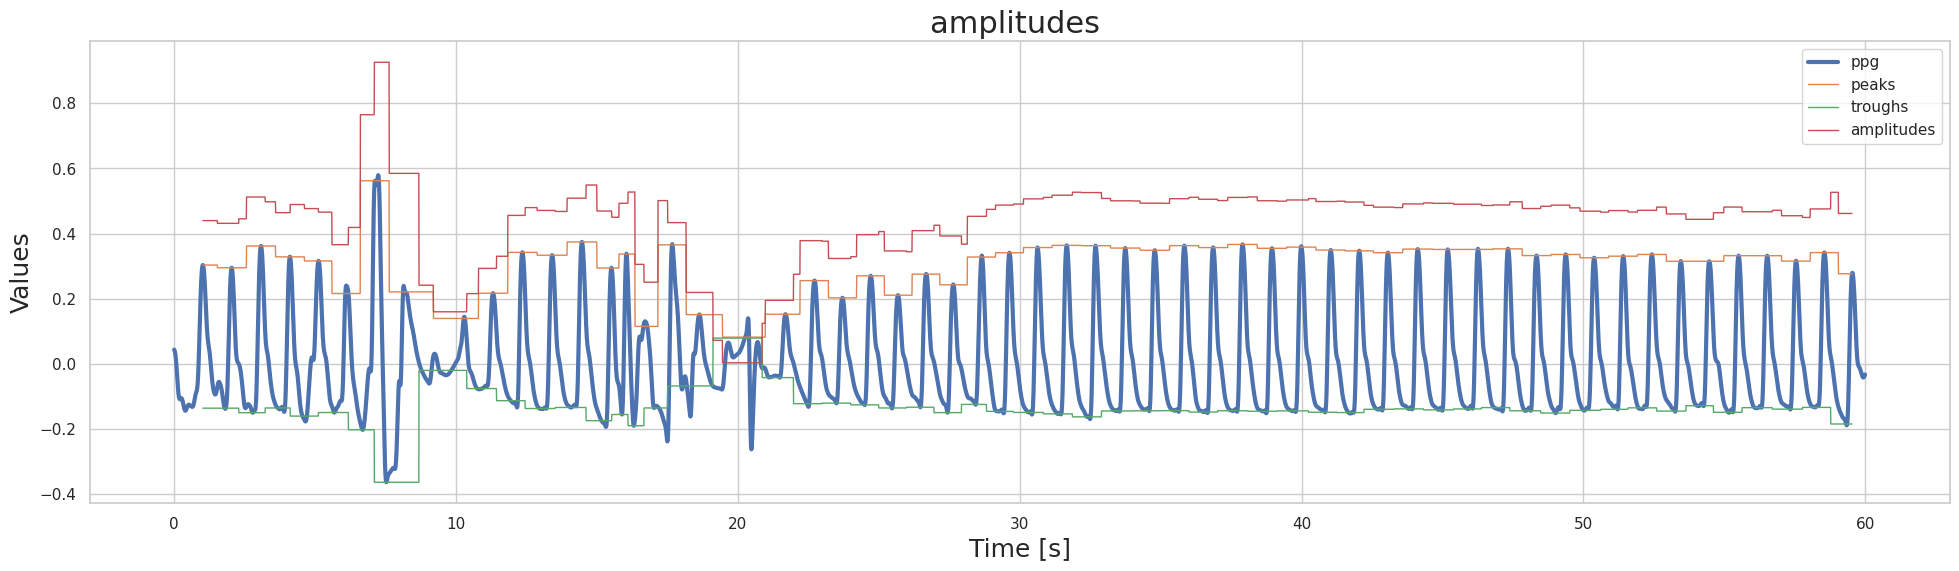

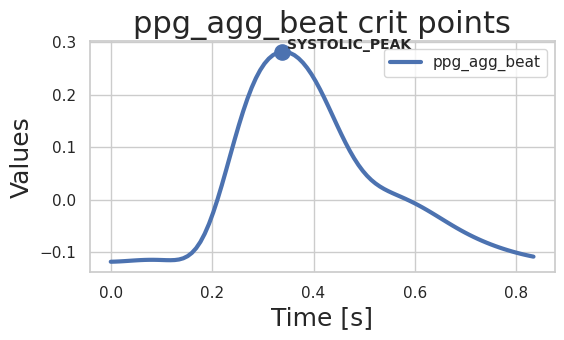

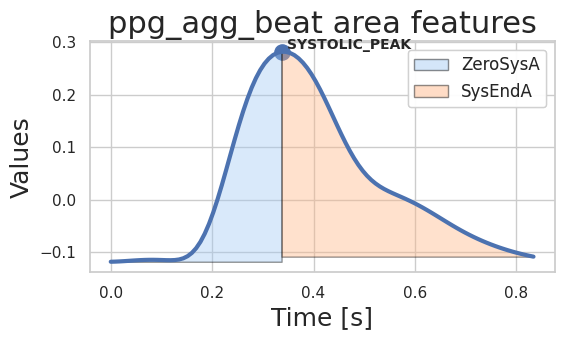

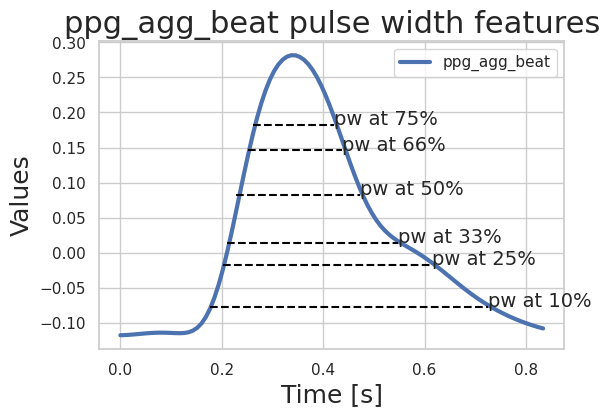

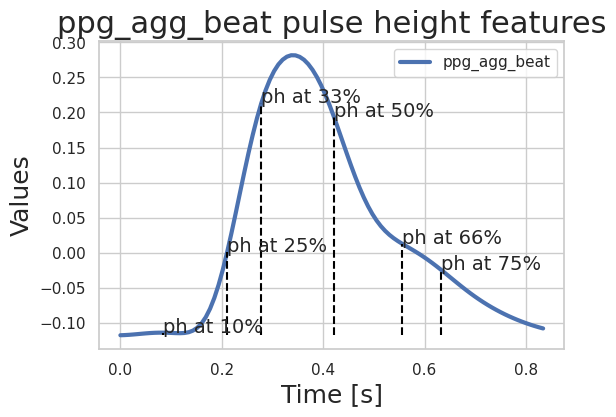

In [9]:
ppg_sig.extract_features(False, True)